## Part 4: Artificial Neural Network

This is part 4 of my Binary Classification Comparison series predicting history of high blood pressure using the <a href="https://www.cdc.gov/brfss/annual_data/annual_2017.html" target="_blank">2017 CDC Behavioral Risk Factor Surveillance System dataset</a>. Given the performance of the previous models, it's pretty clear that an ANN isn't really necessary. I'll still build one for comparison, though. I suspect lots of layers won't really be necessary either, but I'll try a few configurations of layers and see how they compare. I'll be using Keras to build the models, which is a pretty high-level API that uses TensorFlow backend. 

First I'll load the modules and data.

In [1]:
# Import train/val
import pickle
import numpy as np
# For reproducibility
from numpy.random import seed
seed(2019)
from tensorflow import set_random_seed
set_random_seed(2019)
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, log_loss
import keras
from keras import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from matplotlib import pyplot as plt
from matplotlib import rcParams


x_train = pickle.load( open( "x_train.pickle", "rb" ) )
x_val = pickle.load( open( "x_val.pickle", "rb" ) )
y_train = pickle.load( open( "y_train.pickle", "rb" ) )
y_val = pickle.load( open( "y_val.pickle", "rb" ) )
# Variables (selected previously)
keep_vars10 = pickle.load( open( "keep_vars10.pickle", "rb" ) )

Using TensorFlow backend.


I'll test models with 3 different numbers of hidden layers (0, 1 layer of 8 nodes, and 2 layers with 8 and 16 nodes) to get a sense of how the number of hidden layers affects performance. I'll keep thing simple and just use the default adam optimizer settings, but I'll try to keep things moving quickly by using early stopping (after 3 epochs with no validation improvement) with 100 epochs.\* I'll also save the fit from the best epoch for each model.

\* I used these settings to get the models up and running quickly, without having to bother with spending a lot of time tuning things like learning rates, momentum, batch sizes, and other optimizers. Even if this particular choice of settings isn't the most efficient, the nature of the data and the problem is such that it doesn't really matter that much (another few minutes per model is insignificant, especially if it would take much longer to test out other options). Even so, it is interesting to see how these choices influence performance and speed, so will explore that some more a little later.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


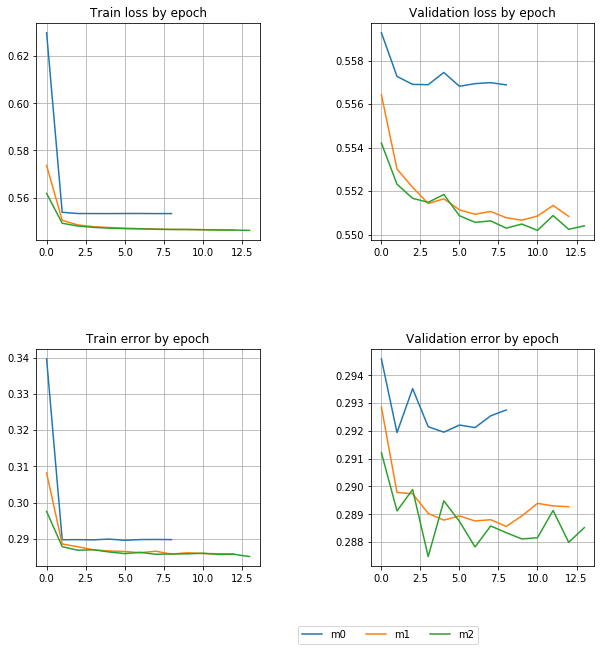

In [2]:
from numpy.random import seed
seed(2019)
from tensorflow import set_random_seed
set_random_seed(2019)

checkpoint = ModelCheckpoint("m0_best_fit", 
                             monitor='val_acc', 
                             verbose=0, 
                             save_best_only=True, 
                             mode='max')
es = EarlyStopping(monitor='val_loss',patience=3)
callbacks_list = [checkpoint,es]

m0 = keras.Sequential()
m0.add(Dense(2,activation='softmax'))
m0.compile('adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
m0_hist = m0.fit(x_train[keep_vars10].to_numpy(),
                 keras.utils.to_categorical(y_train),
                 epochs=100,
                 validation_data=(x_val[keep_vars10],
                                  keras.utils.to_categorical(y_val)),
                verbose=0,
                callbacks=callbacks_list,
                batch_size=256)

checkpoint = ModelCheckpoint("m1_best_fit", 
                             monitor='val_acc', 
                             verbose=0, 
                             save_best_only=True, 
                             mode='max')
es = EarlyStopping(monitor='val_loss',patience=3)
callbacks_list = [checkpoint,es]

m1 = keras.Sequential()
m1.add(Dense(8,activation='relu',
                input_shape=(x_train[keep_vars10].shape[1],)))
m1.add(Dense(2,activation='softmax'))
m1.compile('adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
m1_hist = m1.fit(x_train[keep_vars10].to_numpy(),
                 keras.utils.to_categorical(y_train),
                 epochs=100,
                 validation_data=(x_val[keep_vars10],
                                  keras.utils.to_categorical(y_val)),
                verbose=0,
                callbacks=callbacks_list,
                batch_size=256)

checkpoint = ModelCheckpoint("m2_best_fit", 
                             monitor='val_acc', 
                             verbose=0, 
                             save_best_only=True, 
                             mode='max')
es = EarlyStopping(monitor='val_loss',patience=3)
callbacks_list = [checkpoint,es]

m2 = keras.Sequential()
m2.add(Dense(8,activation='relu',
                input_shape=(x_train[keep_vars10].shape[1],)))
m2.add(Dense(16,activation='relu'))
m2.add(Dense(2,activation='softmax'))
m2.compile('adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
m2_hist = m2.fit(x_train[keep_vars10].to_numpy(),
                 keras.utils.to_categorical(y_train),
                 epochs=100,
                 validation_data=(x_val[keep_vars10],
                                  keras.utils.to_categorical(y_val)),
                verbose=0,
                callbacks=callbacks_list,
                batch_size=256)

plt.rcParams["figure.figsize"] = (10,10) # Make plots bigger
plt.subplot(2,2,1)
plt.plot(m0_hist.epoch,m0_hist.history['loss'])
plt.plot(m1_hist.epoch,m1_hist.history['loss'])
plt.plot(m2_hist.epoch,m2_hist.history['loss'])
plt.title(label='Train loss by epoch')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(m0_hist.epoch,m0_hist.history['val_loss'])
plt.plot(m1_hist.epoch,m1_hist.history['val_loss'])
plt.plot(m2_hist.epoch,m2_hist.history['val_loss'])
plt.title(label='Validation loss by epoch')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(m0_hist.epoch,[1-i for i in m0_hist.history['acc']])
plt.plot(m1_hist.epoch,[1-i for i in m1_hist.history['acc']])
plt.plot(m2_hist.epoch,[1-i for i in m2_hist.history['acc']])
plt.title(label='Train error by epoch')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(m0_hist.epoch,[1-i for i in m0_hist.history['val_acc']])
plt.plot(m1_hist.epoch,[1-i for i in m1_hist.history['val_acc']])
plt.plot(m2_hist.epoch,[1-i for i in m2_hist.history['val_acc']])
plt.title(label='Validation error by epoch')
plt.grid(True)
plt.subplots_adjust(hspace=0.5,
                    wspace=0.5)
plt.legend(['m0', 'm1', 'm2'],
    bbox_to_anchor=(0.5, -.25),ncol=3)
plt.show()

Looks like models 1 and 2 deliver similar loss/accuracy performance, but model 2 converged quicker. In practice, either would work. If prediction time were an issue that could help determine which model to use, but for now I'll just stick with model 2.

Let's take a look at the classification report.

In [3]:
# Retrieve best_fit model
ann_best_model = keras.Sequential()
ann_best_model.add(Dense(8,activation='relu',
                input_shape=(x_train[keep_vars10].shape[1],)))
ann_best_model.add(Dense(16,activation='relu'))
ann_best_model.add(Dense(2,activation='softmax'))
ann_best_model.load_weights("m2_best_fit")
ann_best_model.compile(keras.optimizers.sgd(nesterov=True),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Get classification report
train_preds = ann_best_model.predict_classes(x_train[keep_vars10])
val_preds = ann_best_model.predict_classes(x_val[keep_vars10])
print('Train')
print(confusion_matrix(y_train,train_preds))
print(classification_report(y_train,train_preds))

print('Validation')
print(confusion_matrix(y_val,val_preds))
print(classification_report(y_val,val_preds))

Train
[[122326  35106]
 [ 40861  66952]]
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76    157432
         1.0       0.66      0.62      0.64    107813

   micro avg       0.71      0.71      0.71    265245
   macro avg       0.70      0.70      0.70    265245
weighted avg       0.71      0.71      0.71    265245

Validation
[[30509  8822]
 [10241 16740]]
              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76     39331
         1.0       0.65      0.62      0.64     26981

   micro avg       0.71      0.71      0.71     66312
   macro avg       0.70      0.70      0.70     66312
weighted avg       0.71      0.71      0.71     66312



This model peforms better than the SVM/Logistic Regression models, and on par with the XGBoost model (without taking class imbalance into account). Finally, as with the other models, I'll train one more that takes the imbalance into account and check out the performance.

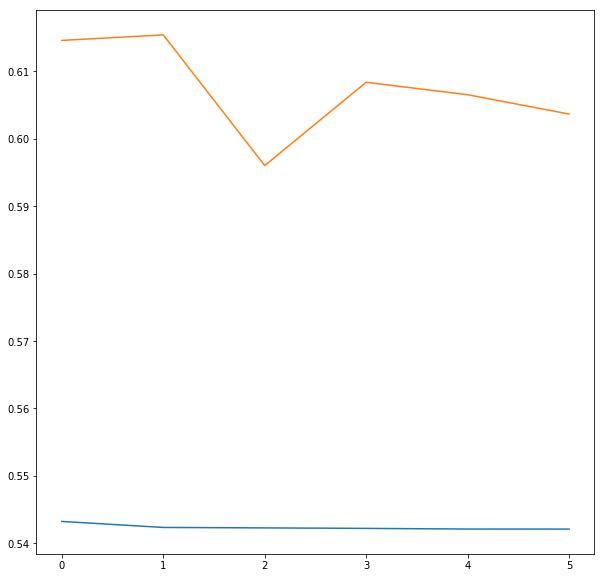

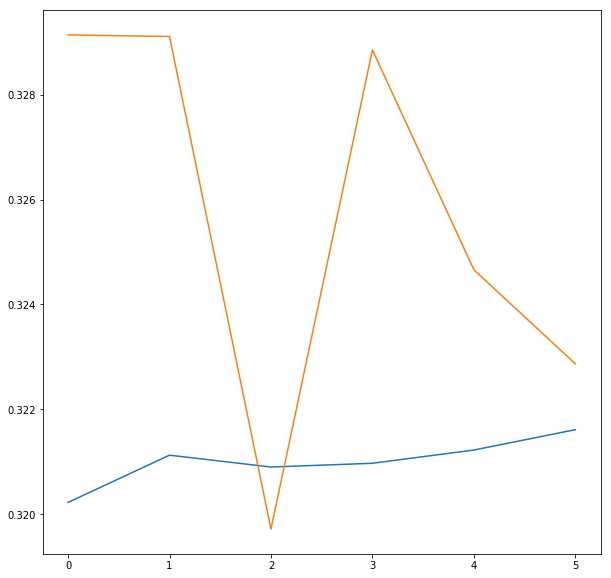

In [4]:
from numpy.random import seed
seed(2019)
from tensorflow import set_random_seed
set_random_seed(2019)

checkpoint = ModelCheckpoint("ann_bal_best_fit", 
                             monitor='val_acc', 
                             verbose=0, 
                             save_best_only=True, 
                             mode='max')
es = EarlyStopping(monitor='val_loss',patience=3)
callbacks_list = [checkpoint,es]

ann_bal = keras.Sequential()
ann_bal.add(Dense(8,activation='relu',
                input_shape=(x_train[keep_vars10].shape[1],)))
ann_bal.add(Dense(16,activation='relu'))
ann_bal.add(Dense(2,activation='softmax'))
ann_bal.compile('adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
ann_bal_hist = m2.fit(x_train[keep_vars10].to_numpy(),
                      keras.utils.to_categorical(y_train),
                      epochs=100,
                      validation_data=(x_val[keep_vars10],
                                       keras.utils.to_categorical(y_val)),
                      verbose=0,
                      callbacks=callbacks_list,
                      class_weight={1.0:sum(y_train==0)/sum(y_train==1),
                                   0.0:sum(y_train==1)/sum(y_train==0)},
                     batch_size=256)

plt.plot(ann_bal_hist.epoch,ann_bal_hist.history['loss'])
plt.plot(ann_bal_hist.epoch,ann_bal_hist.history['val_loss'])
plt.show()
plt.plot(ann_bal_hist.epoch,[1-i for i in ann_bal_hist.history['acc']])
plt.plot(ann_bal_hist.epoch,[1-i for i in ann_bal_hist.history['val_acc']])
plt.show()

Loss/accuracy doesn't improve at all (and in fact gets a tiny bit worse) after the first epoch. This is probably because the gradients in each mini batch sufficiently estimated the sample, which resulted in the model converging by the end of the first epoch. Let's take a look at the classification report:

In [5]:
# Retrieve best_fit model
ann_best_model_bal = keras.Sequential()
ann_best_model_bal.add(Dense(8,activation='relu',
                input_shape=(x_train[keep_vars10].shape[1],)))
ann_best_model_bal.add(Dense(16,activation='relu'))
ann_best_model_bal.add(Dense(2,activation='softmax'))
ann_best_model_bal.load_weights("ann_bal_best_fit")
ann_best_model_bal.compile('adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Get classification report
train_preds1 = ann_best_model_bal.predict_classes(x_train[keep_vars10])
val_preds1 = ann_best_model_bal.predict_classes(x_val[keep_vars10])
print('Train')
print(confusion_matrix(y_train,train_preds1))
print(classification_report(y_train,train_preds1))

print('Validation')
print(confusion_matrix(y_val,val_preds1))
print(classification_report(y_val,val_preds1))

Train
[[90643 66789]
 [17125 90688]]
              precision    recall  f1-score   support

         0.0       0.84      0.58      0.68    157432
         1.0       0.58      0.84      0.68    107813

   micro avg       0.68      0.68      0.68    265245
   macro avg       0.71      0.71      0.68    265245
weighted avg       0.73      0.68      0.68    265245

Validation
[[22492 16839]
 [ 4362 22619]]
              precision    recall  f1-score   support

         0.0       0.84      0.57      0.68     39331
         1.0       0.57      0.84      0.68     26981

   micro avg       0.68      0.68      0.68     66312
   macro avg       0.71      0.71      0.68     66312
weighted avg       0.73      0.68      0.68     66312



In [6]:
# Save balanced and unbalanced models
pickle.dump(ann_best_model, open('ann_unbal.pickle', 'wb'))
pickle.dump(ann_best_model_bal, open('ann_bal.pickle', 'wb'))

These results are interesting. This model produces the best recall rate of all of our tested models so far. However, the precision trade-off is also worse. Again, the choice would depend on priorities. While this is the last stand-alone model I'll train, in my next post I'll explore some ensembling options to see if I can balance the trade-offs of each model.

## Optimizers, batch size, performance

As I mentioned earlier, with this sort of dataset and problem it's not really worth it to spend a ton of time figuing out things like the best configuration of optimizer options and batch sizes. Still, these choices do matter--especially for more complex problems (more predictors, higher dimensions, millions of observations, etc.). I'll play around with a few options here to demonstrate how these choices would have influenced performance and training time (even if the practical impact is negligible for this problem). I won't be doing a deep dive of optimizers and batch size here, but you can find an excellent summary of the math and concepts behind such choices over at <a href="http://ruder.io/optimizing-gradient-descent/" target="_blank">Sebastian Ruder's website</a>.

I'll demonstrate how batch size and optimizer choice influence performance by summarizing the total time and epochs required to reach validation peformance that initiates early stopping (patience of 10, total epochs=1000) and the resulting validation accuracy performance.\* I'll use m2 from earlier (no class imbalance adjustment) for comparison.

\* It's important to note here that the training times and error estimates based on the specified configurations here are not going to be enitrely representative. There's a stochastic component to all of these models (e.g., how weights are initialized), so performance will vary a little each time a model is trained (unless you set a seed). These comparisons are really just for illustration purposes, and actual differences in performance may be different than what's summarized here. To get a better idea of such differences, you'd want to run each model (without a seed) a bunch of times and then calculate means, confidence interavals, etc.

In [7]:
# Batch sizes: 32 (default), 
# 256, 2048, full sample
# Optimizers: Adam (default settings), SGD (no momentum or decay), 
# SGD (nesterov), and Adadelta
bs = [32,256, 2048, x_train.shape[0]]
optimizers = [keras.optimizers.Adam(),
              keras.optimizers.sgd(),
              keras.optimizers.sgd(nesterov=True),
              keras.optimizers.adadelta()]
combinations = [(x, y) for x in bs for y in optimizers]

In [8]:
# Keep track of training time using callbacks
import time
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

time_callback = TimeHistory()

In [9]:
from numpy.random import seed
seed(2019)
from tensorflow import set_random_seed
set_random_seed(2019)

loop_results = []
loop_n = 0
for i in combinations:
    checkpoint = ModelCheckpoint("loop_"+str(loop_n), 
                             monitor='val_acc', 
                             verbose=0, 
                             save_best_only=True, 
                             mode='max')
    time_callback = TimeHistory()
    es = EarlyStopping(monitor='val_loss',patience=5,verbose=0)
    callbacks_list = [checkpoint,es,time_callback]

    loop_model = keras.Sequential()
    loop_model.add(Dense(8,activation='relu',
                    input_shape=(x_train[keep_vars10].shape[1],)))
    loop_model.add(Dense(16,activation='relu'))
    loop_model.add(Dense(2,activation='softmax'))
    loop_model.compile(i[1],
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    mloop_model_hist = loop_model.fit(x_train[keep_vars10].to_numpy(),
                     keras.utils.to_categorical(y_train),
                     epochs=1000,
                     validation_data=(x_val[keep_vars10],
                                      keras.utils.to_categorical(y_val)),
                    verbose=0,
                    callbacks=callbacks_list,
                    batch_size=i[0])
    loop_results.append((loop_model,
                         mloop_model_hist,
                        time_callback.times,
                        len(time_callback.times)))
    print('Completed Loop '+str(loop_n))
    loop_n+=1

Completed Loop 0
Completed Loop 1
Completed Loop 2
Completed Loop 3
Completed Loop 4
Completed Loop 5
Completed Loop 6
Completed Loop 7
Completed Loop 8
Completed Loop 9
Completed Loop 10
Completed Loop 11
Completed Loop 12
Completed Loop 13
Completed Loop 14
Completed Loop 15


Text(0, 0.5, 'Validation Error')

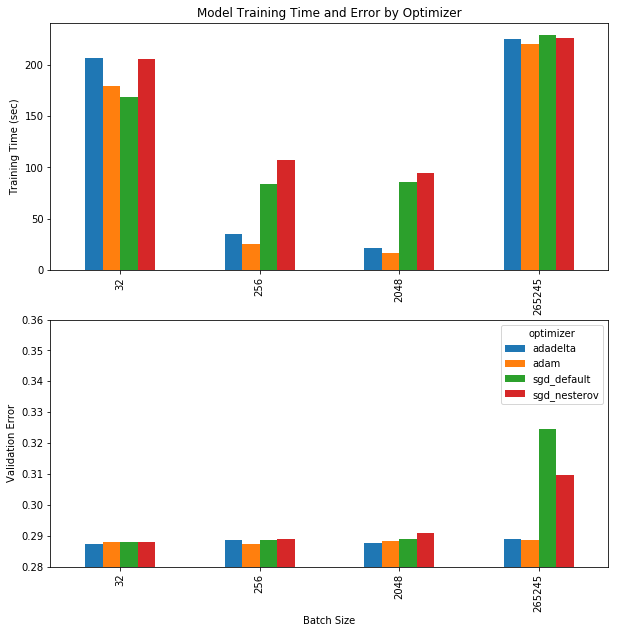

In [10]:
# Extract time, epochs
time_hist = [i[2] for i in loop_results]
total_time = [sum(i) for i in time_hist]
total_epochs = [i[3] for i in loop_results]

# Get predictions from best fit
loop_n = 0
error_list = []
for i in combinations:
    loop_model = keras.Sequential()
    loop_model.add(Dense(8,activation='relu',
                    input_shape=(x_train[keep_vars10].shape[1],)))
    loop_model.add(Dense(16,activation='relu'))
    loop_model.add(Dense(2,activation='softmax'))
    loop_model.load_weights("loop_"+str(loop_n))
    loop_model.compile(i[1],
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    loop_preds = loop_model.predict_classes(x_val[keep_vars10])
    error_list.append(1-accuracy_score(y_val,loop_preds))
    loop_n += 1

# Comparison dataframe
comparison_df = pd.DataFrame({
    'optimizer':['adam', 'sgd_default', 'sgd_nesterov', 'adadelta'] * 4,
    'batch_size':[i[0] for i in combinations],
    'time':total_time,
    'epochs':total_epochs,
    'error':error_list
})

# Plot performance
gdf = comparison_df.pivot(index='batch_size',columns='optimizer')

fig, axes = plt.subplots(nrows=2, ncols=1)
width = .5

gdf['time'].plot(kind='bar', ax=axes[0], width=width,
                title='Model Training Time and Error by Optimizer',
                legend=False)
gdf['error'].plot(kind='bar', ax=axes[1], width=width,ylim=[.28,.36])

axes[1].set_xlabel('Batch Size')
axes[0].set_ylabel('Training Time (sec)')
axes[1].set_ylabel('Validation Error')

In [11]:
# Fastest training:
comparison_df.sort_values('time').head()

,optimizer,batch_size,time,epochs,error
8,adam,2048,16.708477,45,0.288470
11,adadelta,2048,21.427450,60,0.287761
4,adam,256,25.337779,18,0.287188
7,adadelta,256,34.727662,24,0.288620
5,sgd_default,256,83.967006,71,0.288605


Not surprisingly, validation error doesn't really vary much by optimizer or batch size. Some of the full batch configurations do show worse error performance, but that is mainly because the training had reached the maximum number of epochs I set (1000). Had I let it run longer, the error likely would have been comparable. 

Given roughly equivalent error performance, choice of optimizer and batch size will depend on training time. Overall, adam (even at default values) and adadelta run faster than good old stochastic gradient descent. The difference here isn't all that Earth shattering practically speaking, but it is still pretty profound. The default adam configuration took a little less than 3 minutes to train with early stopping. Conversely, the fastest training time with adadelta and a batch size of 2048 only took 13.8 seconds. Working with more difficult datasets, it would make sense to spend some time tinkering with these options, especially if it's clear that the loss is not decreasing as expected.